In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns


#F mini ON
FMO = pd.read_csv('result_tables_FASEB/FminiON_all.csv')
FMO_WT = pd.read_csv('result_tables_FASEB/FminiON_WT.csv')
FMO_het = pd.read_csv('result_tables_FASEB/FminiON_het.csv')
FMO_homo= pd.read_csv('result_tables_FASEB/FminiON_homo.csv')
##Fmini OFF
FMOFF = pd.read_csv('result_tables_FASEB/FminiOFF_all.csv')

#UHD
UHD = pd.read_csv('result_tables_FASEB/UHD_all.csv')

#HD1
HD1 = pd.read_csv('result_tables_FASEB/HD1_all.csv')

#HD2
HD2 = pd.read_csv('result_tables_FASEB/HD2_all.csv')

##LEDs
LED = pd.read_csv('result_tables_FASEB/LED_all.csv')

#OFF trans SMrf
OFFtranssmrf = pd.read_csv('result_tables_FASEB/OFF_trans_SMRF_all.csv')

#OFF trans Merf
OFFtransmerf = pd.read_csv('result_tables_FASEB/OFF_trans_MERF_all.csv')

##On trans smrf
ONTransSmrRF = pd.read_csv('result_tables_FASEB/ON_trans_SMRF_all.csv')

##On trans merf
ONTransmerRF = pd.read_csv('result_tables_FASEB/ON_trans_MERF_all.csv')

##On_Trans_EW6t
ON_Trans_EW6t = pd.read_csv('result_tables_FASEB/ON_trans_EW6t_all.csv')

#ON alpha
OA_wt = pd.read_csv('result_tables/ONalpha_WT.csv')
OA_wt = OA_wt[(OA_wt['peak_FR'] != 0) & (~np.isnan(OA_wt['age']))]
OA_het = pd.read_csv('result_tables/ONalpha_het.csv')
OA_het = OA_het[(OA_het['peak_FR'] != 0) & (~np.isnan(OA_het['age']))]
OA_homo = pd.read_csv('result_tables/ONalpha_homo.csv')
OA_homo = OA_homo[(OA_homo['peak_FR'] != 0) & (~np.isnan(OA_homo['age']))]
OA = pd.concat([OA_wt,OA_het, OA_homo], ignore_index=True)

#OFF sus alpa
OFFsAlpha_wt = pd.read_csv('result_tables/OFFsAlpha_WT.csv')
OFFsAlpha_wt = OFFsAlpha_wt[(OFFsAlpha_wt['peak_FR'] != 0) & (~np.isnan(OFFsAlpha_wt['age']))]
OFFsAlpha_het = pd.read_csv('result_tables/OFFsAlpha_het.csv')

OFFsAlpha_homo = pd.read_csv('result_tables/OFFsAlpha_homo.csv')
OFFsAlpha = pd.concat([OFFsAlpha_wt,OFFsAlpha_het, OFFsAlpha_homo], ignore_index=True)

In [2]:
'''
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
def lme(celltype, response):
    celltype['genotype'] = pd.Categorical(celltype['genotype'], categories=['WT', 'Trarg1(Tusc5-eGFP/WT)', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)'])
    model = mixedlm(f"{response}~genotype * age ", celltype, groups=celltype["animal_id"])
    result = model.fit()    
    print(result.summary())
    #print(FMO)
    return result

result = lme(FMO, 'peak_FR')
'''

'\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import mixedlm\ndef lme(celltype, response):\n    celltype[\'genotype\'] = pd.Categorical(celltype[\'genotype\'], categories=[\'WT\', \'Trarg1(Tusc5-eGFP/WT)\', \'Trarg1(Tusc5-eGFP/Tusc5-eGFP)\'])\n    model = mixedlm(f"{response}~genotype * age ", celltype, groups=celltype["animal_id"])\n    result = model.fit()    \n    print(result.summary())\n    #print(FMO)\n    return result\n\nresult = lme(FMO, \'peak_FR\')\n'

In [3]:
'''
# Generate predicted values for plotting
age_range = np.linspace(FMO['age'].min(), FMO['age'].max(), 100)
genotypes = ['WT', 'Trarg1(Tusc5-eGFP/WT)', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)']

# Create a DataFrame for predictions
pred_data = pd.DataFrame({
    'age': np.tile(age_range, len(genotypes)),
    'genotype': np.repeat(genotypes, len(age_range)),
    'animal_id': np.repeat(FMO['animal_id'].unique()[0], len(age_range) * len(genotypes))  # use the first animal_id for grouping
})

# Predict values
pred_data['peak_FR_pred'] = result.predict(pred_data)

# Plot the results
plt.figure(figsize=(10, 6))
for genotype in genotypes:
    subset = pred_data[pred_data['genotype'] == genotype]
    plt.plot(subset['age'], subset['peak_FR_pred'], label=genotype)

plt.xlabel('Age')
plt.ylabel('Predicted Peak FR')
plt.title('Predicted Peak FR by Age and Genotype')
plt.legend(title='Genotype')
plt.show()
'''

"\n# Generate predicted values for plotting\nage_range = np.linspace(FMO['age'].min(), FMO['age'].max(), 100)\ngenotypes = ['WT', 'Trarg1(Tusc5-eGFP/WT)', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)']\n\n# Create a DataFrame for predictions\npred_data = pd.DataFrame({\n    'age': np.tile(age_range, len(genotypes)),\n    'genotype': np.repeat(genotypes, len(age_range)),\n    'animal_id': np.repeat(FMO['animal_id'].unique()[0], len(age_range) * len(genotypes))  # use the first animal_id for grouping\n})\n\n# Predict values\npred_data['peak_FR_pred'] = result.predict(pred_data)\n\n# Plot the results\nplt.figure(figsize=(10, 6))\nfor genotype in genotypes:\n    subset = pred_data[pred_data['genotype'] == genotype]\n    plt.plot(subset['age'], subset['peak_FR_pred'], label=genotype)\n\nplt.xlabel('Age')\nplt.ylabel('Predicted Peak FR')\nplt.title('Predicted Peak FR by Age and Genotype')\nplt.legend(title='Genotype')\nplt.show()\n"

In [4]:
'''
# Function to fit the linear mixed-effects model
def lme(celltype, response):
    celltype['sex'] = pd.Categorical(celltype['sex'])  # Ensure 'sex' is treated as a categorical variable
    model = mixedlm(f"{response} ~ age * sex", celltype, groups=celltype["animal_id"])
    result = model.fit()
    print(result.summary())
    return result

# Fit the model
result = lme(FMO_homo, 'peak_FR')

# Extract p-value for the interaction term
p_value_interaction = result.pvalues['age:sex[T.Male]']

# Generate predicted values for plotting
age_range = np.linspace(FMO_homo['age'].min(), FMO_homo['age'].max(), 100)
sexes = ['Male', 'Female']

# Create a DataFrame for predictions
pred_data = pd.DataFrame({
    'age': np.tile(age_range, len(sexes)),
    'sex': np.repeat(sexes, len(age_range)),
    'animal_id': np.repeat(FMO_homo['animal_id'].unique()[0], len(age_range) * len(sexes))  # use the first animal_id for grouping
})

# Predict values
pred_data['peak_FR_pred'] = result.predict(pred_data)

# Plot the results with interaction effects highlighted
plt.figure(figsize=(10, 6))
colors = {'Male': 'blue', 'Female': 'red'}
line_styles = {'Male': '-', 'Female': '--'}

for sex in sexes:
    subset = pred_data[pred_data['sex'] == sex]
    plt.plot(subset['age'], subset['peak_FR_pred'], label=f'{sex}', color=colors[sex], linestyle=line_styles[sex])

plt.xlabel('Age')
plt.ylabel('Predicted Peak FR')
plt.title('Predicted Peak FR by Age and Sex with Interaction Effects')
plt.legend(title='Sex', loc='upper left')

# Annotate the plot with the p-value for the interaction term
plt.annotate(f'Interaction p-value: {p_value_interaction:.3f}', xy=(0.55, 0.95), xycoords='axes fraction', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()
'''

'\n# Function to fit the linear mixed-effects model\ndef lme(celltype, response):\n    celltype[\'sex\'] = pd.Categorical(celltype[\'sex\'])  # Ensure \'sex\' is treated as a categorical variable\n    model = mixedlm(f"{response} ~ age * sex", celltype, groups=celltype["animal_id"])\n    result = model.fit()\n    print(result.summary())\n    return result\n\n# Fit the model\nresult = lme(FMO_homo, \'peak_FR\')\n\n# Extract p-value for the interaction term\np_value_interaction = result.pvalues[\'age:sex[T.Male]\']\n\n# Generate predicted values for plotting\nage_range = np.linspace(FMO_homo[\'age\'].min(), FMO_homo[\'age\'].max(), 100)\nsexes = [\'Male\', \'Female\']\n\n# Create a DataFrame for predictions\npred_data = pd.DataFrame({\n    \'age\': np.tile(age_range, len(sexes)),\n    \'sex\': np.repeat(sexes, len(age_range)),\n    \'animal_id\': np.repeat(FMO_homo[\'animal_id\'].unique()[0], len(age_range) * len(sexes))  # use the first animal_id for grouping\n})\n\n# Predict values\npr

In [5]:
'''
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import numpy as np

def lme(celltype, response):
    celltype['genotype'] = pd.Categorical(celltype['genotype'], categories=['WT', 'Trarg1(Tusc5-eGFP/WT)', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)'])
    model = mixedlm(f"{response}~genotype * age", celltype, groups=celltype["animal_id"])
    result = model.fit()
    print(result.summary())
    return result

result = lme(FMO, 'peak_FR')

# Calculate Marginal and Conditional R-squared
def calculate_r_squared(result, data, response):
    # Extract fixed effects and random effects
    fixed_effects = result.fittedvalues
    random_effects = result.random_effects

    # Calculate variance components
    var_fixed = np.var(fixed_effects)
    var_random = result.cov_re.iloc[0, 0]
    var_residual = result.scale

    # Calculate total variance
    var_total = var_fixed + var_random + var_residual

    # Calculate marginal R-squared (variance explained by fixed factors)
    r_squared_marginal = var_fixed / var_total

    # Calculate conditional R-squared (variance explained by both fixed and random factors)
    r_squared_conditional = (var_fixed + var_random) / var_total

    return r_squared_marginal, r_squared_conditional

r_squared_marginal, r_squared_conditional = calculate_r_squared(result, FMO, 'peak_FR')

print(f"Marginal R-squared: {r_squared_marginal}")
print(f"Conditional R-squared: {r_squared_conditional}")
'''

'\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import mixedlm\nimport numpy as np\n\ndef lme(celltype, response):\n    celltype[\'genotype\'] = pd.Categorical(celltype[\'genotype\'], categories=[\'WT\', \'Trarg1(Tusc5-eGFP/WT)\', \'Trarg1(Tusc5-eGFP/Tusc5-eGFP)\'])\n    model = mixedlm(f"{response}~genotype * age", celltype, groups=celltype["animal_id"])\n    result = model.fit()\n    print(result.summary())\n    return result\n\nresult = lme(FMO, \'peak_FR\')\n\n# Calculate Marginal and Conditional R-squared\ndef calculate_r_squared(result, data, response):\n    # Extract fixed effects and random effects\n    fixed_effects = result.fittedvalues\n    random_effects = result.random_effects\n\n    # Calculate variance components\n    var_fixed = np.var(fixed_effects)\n    var_random = result.cov_re.iloc[0, 0]\n    var_residual = result.scale\n\n    # Calculate total variance\n    var_total = var_fixed + var_random + var_residual\n\n    # Calculate marginal R-squared (varia

In [21]:
FMO

,genotype,sex,age,which_eye,quadrant,cell_type,animal_id,peak_FR,baseline_FR,spot_sizes,...,min_spikes_ON,min_spikes_OFF,min_size_ON,min_size_OFF,peak_size_ON,peak_size_OFF,peak_spikes_ON,peak_spikes_OFF,half_peak_size,SI
0,WT,Male,47.8571,Right,VN,F-mini-ON,DJID_1503,100.000000,0.000000,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,0.000000,0.000000,30,30,224,224,16.400000,0.400000,NaN,NaN
1,Tusc5+/-,Male,26.2857,Left,DN,F-mini-ON,DJID_1581,300.000000,4.055560,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,2.000000,0.000000,30,82,115,160,16.666667,7.000000,NaN,NaN
2,Tusc5+/-,Male,26.2857,Left,DN,F-mini-ON,DJID_1581,333.333333,1.277780,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,1.000000,0.000000,858,42,115,160,21.666667,1.666667,1486.500000,NaN
3,Tusc5-/-,Male,8.0000,Left,VT,F-mini-ON,DJID_1582,333.333333,0.000000,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,4.000000,0.000000,858,30,115,30,13.333333,0.000000,2322.000000,NaN
4,Tusc5-/-,Male,8.0000,Left,VT,F-mini-ON,DJID_1582,333.333333,0.111111,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,5.000000,0.000000,614,30,42,115,17.666667,6.333333,801.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tusc5+/-,Male,19.7143,Right,DT,F-mini-ON,DJID_3106,283.333333,0.472222,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,1.333333,0.333333,30,59,224,314,15.833333,3.166667,NaN,NaN
79,Tusc5+/-,Female,67.8571,Right,NaN,F-mini-ON,DJID_2782,366.666667,0.000000,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,4.666667,0.000000,858,30,59,82,14.333333,9.666667,1427.333333,NaN
80,Tusc5+/-,Female,67.8571,Right,VN,F-mini-ON,DJID_2782,333.333333,0.000000,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,2.000000,0.000000,30,30,59,30,11.333333,0.000000,NaN,NaN
81,Tusc5+/-,Female,67.8571,Right,VN,F-mini-ON,DJID_2782,133.333333,0.000000,"[30,42,59,82,115,160,224,314,439,614,858,1200]",...,0.000000,0.000000,30,30,1200,160,11.666667,1.000000,NaN,NaN


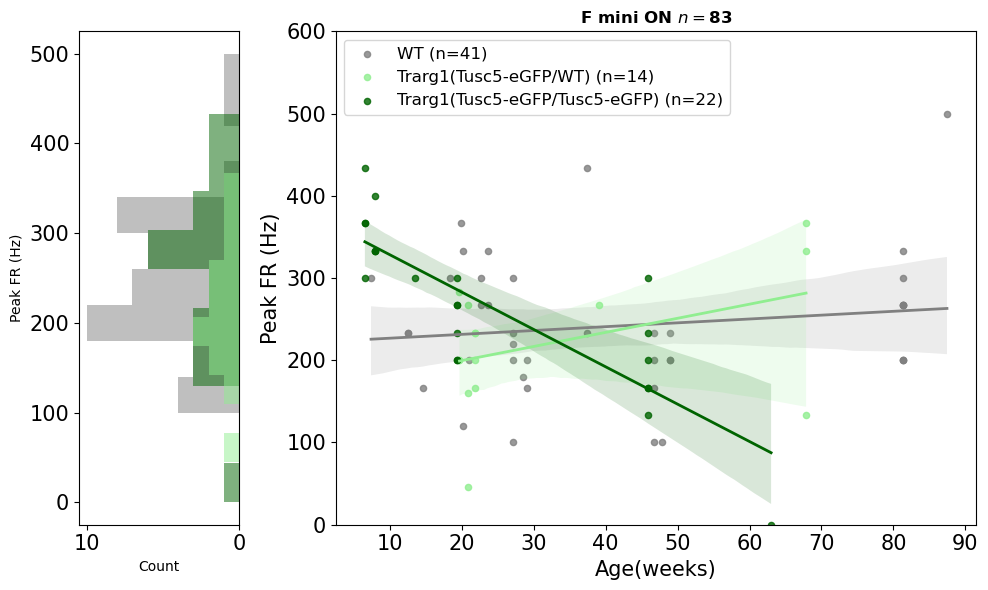

In [34]:
def scatter_regression_lines(ax, df, celltype, ylabel, title):
    total_n = len(df)
    custom_palette = {'WT': 'gray', 'Trarg1(Tusc5-eGFP/WT)': 'lightgreen', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)': 'darkgreen'}
    for genotype, color in custom_palette.items():
        genotype_data = df[df['genotype'] == genotype]
        sns.regplot(x='age', y='peak_FR', data=genotype_data, ax=ax, label=f'{genotype} (n={len(genotype_data)})', color=color, scatter_kws={'s': 20}, line_kws={'linewidth': 2})
    ax.set_title(f'{celltype} ' + '$n= $' + str(total_n), fontweight='bold')
    ax.set_xlabel('Age(weeks)',fontsize='15')
    ax.set_ylabel(title, fontsize='15')
    ax.set_ylim([0, 600])
    ax.legend(loc= 'best',prop={'size': 12})
    ax.tick_params(axis='both', which='major', labelsize=15)

fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 4]})

# Histograms
axs[0].hist(FMO_WT['peak_FR'], alpha=0.5, orientation='horizontal', color='grey')
axs[0].hist(FMO_homo['peak_FR'], alpha=0.5, orientation='horizontal', color='darkgreen')
axs[0].hist(FMO_het['peak_FR'], alpha=0.5, orientation='horizontal', color='lightgreen')
axs[0].invert_xaxis()
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Peak FR (Hz)')
axs[0].tick_params(axis='both', which='major', labelsize=15)
#axs[0].legend()

# Scatter plot with regression lines
scatter_regression_lines(axs[1], FMO, 'F mini ON', 'Peak FR (Hz)', 'Peak FR (Hz)')

plt.tight_layout()
plt.show()



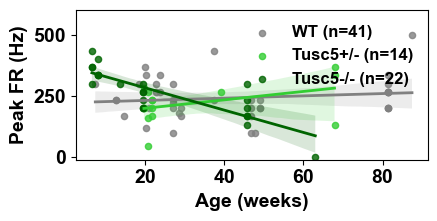

In [11]:
import statsmodels.api as sm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set global font properties
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['font.size'] = 14
def scatter_regression_lines(ax, df, celltype, ylabel, title):
    total_n = len(df)
    custom_palette = {'WT': 'gray', 'Trarg1(Tusc5-eGFP/WT)': 'limegreen', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)': 'darkgreen'}
    custom_labels = {'WT': 'WT', 'Trarg1(Tusc5-eGFP/WT)': 'Tusc5+/-', 'Trarg1(Tusc5-eGFP/Tusc5-eGFP)': 'Tusc5-/-'}
    celltypes = []
    slopes = []
    lower_ci = []
    upper_ci = []
    genotypes = []

    for genotype, color in custom_palette.items():
        genotype_data = df[df['genotype'] == genotype]
        
        if len(genotype_data) < 2:
            print(f"Not enough data to fit a model for genotype: {genotype}")
            continue
        
        # Fit the regression model
        X = genotype_data['age']
        y = genotype_data['peak_FR']
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        model = sm.OLS(y, X).fit()
        
        # Check if model has enough parameters
        if len(model.params) < 2:
            print(f"Model fit failed for genotype: {genotype}")
            continue
        
        slope = model.params[1]  # Extract the slope
        conf_int = model.conf_int(alpha=0.05)  # 95% confidence intervals
        age_confidence_interval = conf_int.loc['age']
        lower_bound = age_confidence_interval[0]
        upper_bound = age_confidence_interval[1]
        
        # Store the genotype, slope, confidence intervals, and celltype
        celltypes.append(celltype)
        genotypes.append(genotype)
        slopes.append(slope)
        lower_ci.append(lower_bound)
        upper_ci.append(upper_bound)
        
        # Plotting
        sns.regplot(x='age', y='peak_re directions?
        'celltype': celltypes,
        'genotype': genotypes,
        'slope': slopes,
        'lower_ci': lower_ci,
        'upper_ci': upper_ci
    })

    # Plot adjustments
    #ax.set_title(f'{celltype} ' + '$n= $' + str(total_n), fontweight='bold')
    ax.set_xlabel('Age (weeks)', fontweight='semibold')
    ax.set_ylabel(title, fontweight='semibold')
    ax.set_ylim([-10, 600])
    axs.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize='12', frameon=False)
    ax.tick_params(axis='both', which='major', labelsize=14)

    return results_df

fig, axs = plt.subplots(1, 1, figsize=(4.6,2.5))
fig.patch.set_facecolor('white')
axs.set_facecolor('white')
'''
# Histograms
axs[0].hist(FMO_WT['peak_FR'], alpha=0.5, orientation='horizontal', color='gray')
axs[0].hist(FMO_homo['peak_FR'], alpha=0.5, orientation='horizontal', color='darkgreen')
axs[0].hist(FMO_het['peak_FR'], alpha=0.5, orientation='horizontal', color='limegreen')
axs[0].invert_xaxis()
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Peak FR (Hz)')
axs[0].tick_params(axis='both', which='major', labelsize=18)
'''
# Scatter plot with regression lines
results_df = scatter_regression_lines(axs, FMO, 'F mini ON', 'Peak FR (Hz)', 'Peak FR (Hz)')

plt.tight_layout()
plt.show()





TypeError: 'Axes' object is not subscriptable

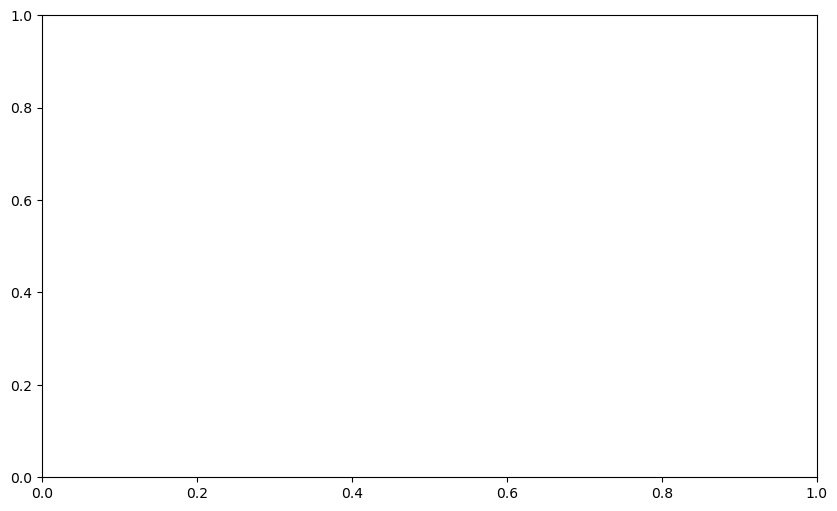

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Histograms
axs[0].hist(FMO_WT['peak_FR'], alpha=0.5, orientation='horizontal', color='grey')
axs[0].hist(FMO_homo['peak_FR'], alpha=0.5, orientation='horizontal', color='darkgreen')
axs[0].hist(FMO_het['peak_FR'], alpha=0.5, orientation='horizontal', color='limegreen')
axs[0].invert_xaxis()
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Peak FR (Hz)')
#axs[0].legend()

# Scatter plot with regression lines and get slopes
FminiON_slopes = scatter_regression_lines(axs[1], FMO, 'F mini ON', 'Peak FR (Hz)', 'Peak FR (Hz)')

plt.tight_layout()
plt.show()




In [9]:
FminiON_slopes

,celltype,genotype,slope,lower_ci,upper_ci
0,F mini ON,WT,0.467450,-0.591869,1.526768
1,F mini ON,Trarg1(Tusc5-eGFP/WT),1.715858,-0.662455,4.094170
2,F mini ON,Trarg1(Tusc5-eGFP/Tusc5-eGFP),-4.546026,-5.992166,-3.099887


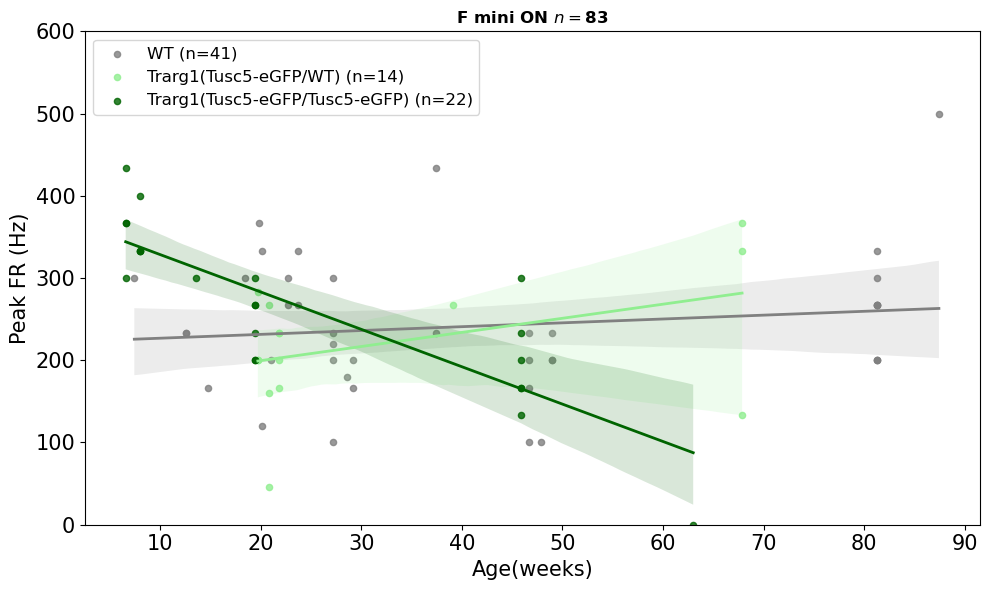

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
FminiON_slopes = scatter_regression_lines(axs, FMO, 'F mini ON', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

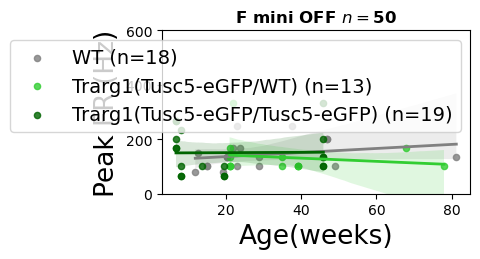

In [11]:
#F mini OFF
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
FminiOFF_slopes = scatter_regression_lines(axs, FMOFF, 'F mini OFF', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

In [12]:
FminiOFF_slopes

,celltype,genotype,slope,lower_ci,upper_ci
0,F mini OFF,WT,0.743756,-0.815631,2.303142
1,F mini OFF,Trarg1(Tusc5-eGFP/WT),-0.584927,-2.880717,1.710863
2,F mini OFF,Trarg1(Tusc5-eGFP/Tusc5-eGFP),0.064002,-2.271636,2.399640


Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/WT)


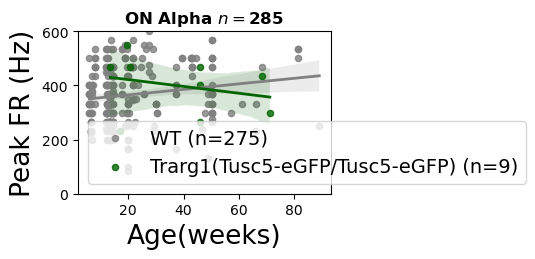

In [13]:

fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
ON_alpha_slopes = scatter_regression_lines(axs, OA, 'ON Alpha', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()


Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/Tusc5-eGFP)


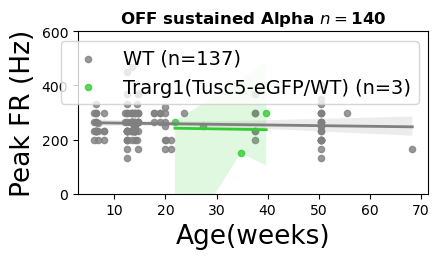

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
OFFsAlpha_slopes = scatter_regression_lines(axs, OFFsAlpha, 'OFF sustained Alpha', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()


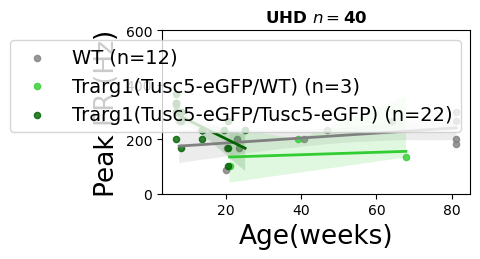

In [15]:
#UHD
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
UHD_slopes = scatter_regression_lines(axs, UHD, 'UHD', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

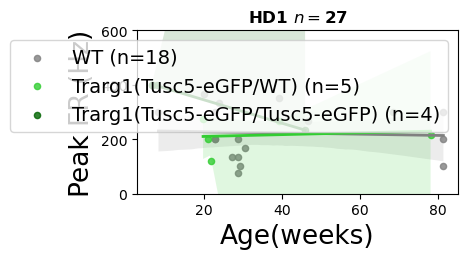

In [16]:
#HD1
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
HD1_slopes = scatter_regression_lines(axs, HD1, 'HD1', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

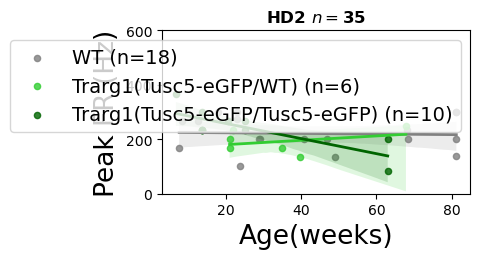

In [17]:
#HD2
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
HD2_slopes = scatter_regression_lines(axs, HD2, 'HD2', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/WT)
Model fit failed for genotype: Trarg1(Tusc5-eGFP/Tusc5-eGFP)


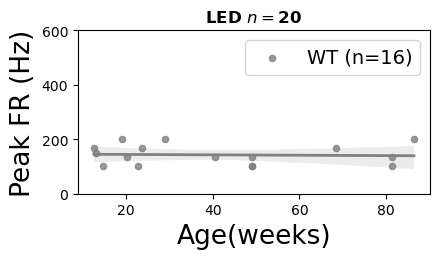

In [18]:
#LED
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
LED_slopes = scatter_regression_lines(axs, LED, 'LED', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/WT)


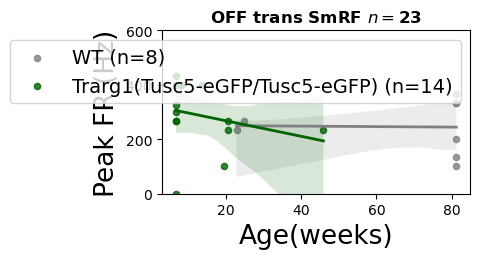

In [19]:
#OFF trans smrf 
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
OFFtranssmrf_slopes = scatter_regression_lines(axs, OFFtranssmrf, 'OFF trans SmRF', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()


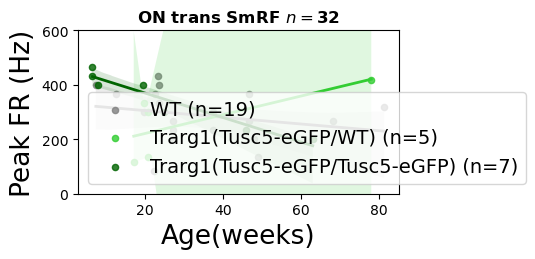

In [20]:
#ON trans smrf 
ONTransSmrRF = ONTransSmrRF[(ONTransSmrRF['peak_FR'] != 0) & (~np.isnan(ONTransSmrRF['age']))]
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
ONTransSmrRF_slopes = scatter_regression_lines(axs, ONTransSmrRF, 'ON trans SmRF', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/WT)
Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/Tusc5-eGFP)


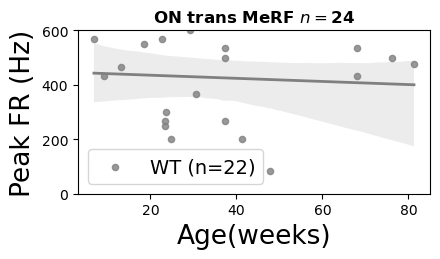

In [21]:
#ON trans merf 
ONTransmerRF = ONTransmerRF[(ONTransmerRF['peak_FR'] != 0) & (~np.isnan(ONTransmerRF['age']))]
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
ONTransmerRF_slopes = scatter_regression_lines(axs, ONTransmerRF, 'ON trans MeRF', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

Model fit failed for genotype: Trarg1(Tusc5-eGFP/WT)


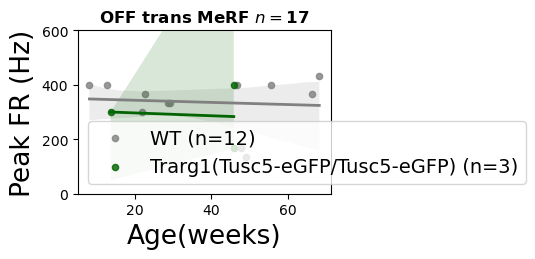

In [22]:
#OFF trans merf 
OFFtransmerf = OFFtransmerf[(OFFtransmerf['peak_FR'] != 0) & (~np.isnan(OFFtransmerf['age']))]
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
OFFtransmerf_slopes = scatter_regression_lines(axs, OFFtransmerf, 'OFF trans MeRF', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

Not enough data to fit a model for genotype: Trarg1(Tusc5-eGFP/Tusc5-eGFP)


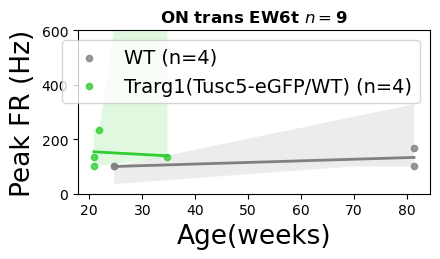

In [23]:
ON_Trans_EW6t = ON_Trans_EW6t[(ON_Trans_EW6t['peak_FR'] != 0) & (~np.isnan(ON_Trans_EW6t['age']))]
fig, axs = plt.subplots(1, 1, figsize=(10*0.45, 6*0.45))
ON_Trans_EW6t_slopes = scatter_regression_lines(axs, ON_Trans_EW6t, 'ON trans EW6t', 'Peak FR (Hz)', 'Peak FR (Hz)')
plt.tight_layout()
plt.show()

In [24]:
##Slopes
FminiON_slopes
FminiOFF_slopes
ON_alpha_slopes
#OFFsAlpha_slopes
HD1_slopes
HD2_slopes
UHD_slopes
ONTransSmrRF_slopes
ONTransmerRF_slopes
OFFtranssmrf_slopes
#OFFtransmerf_slopes
ON_Trans_EW6t_slopes
slopes = pd.concat([
    FminiON_slopes, FminiOFF_slopes,
    HD1_slopes, HD2_slopes, UHD_slopes, ONTransSmrRF_slopes, ONTransmerRF_slopes,
    OFFtranssmrf_slopes, ON_Trans_EW6t_slopes,ON_alpha_slopes
], ignore_index=True)
slopes.to_csv('LR_slopes.csv')

In [25]:
#slopes.to_excel('LR_slopes.xlsx', index=False)

In [26]:
slopes = pd.concat([
    FminiON_slopes, FminiOFF_slopes,
    HD1_slopes, HD2_slopes, UHD_slopes, ONTransSmrRF_slopes, ONTransmerRF_slopes,
    OFFtranssmrf_slopes, ON_Trans_EW6t_slopes,ON_alpha_slopes
], ignore_index=True)
slopes
df = slopes

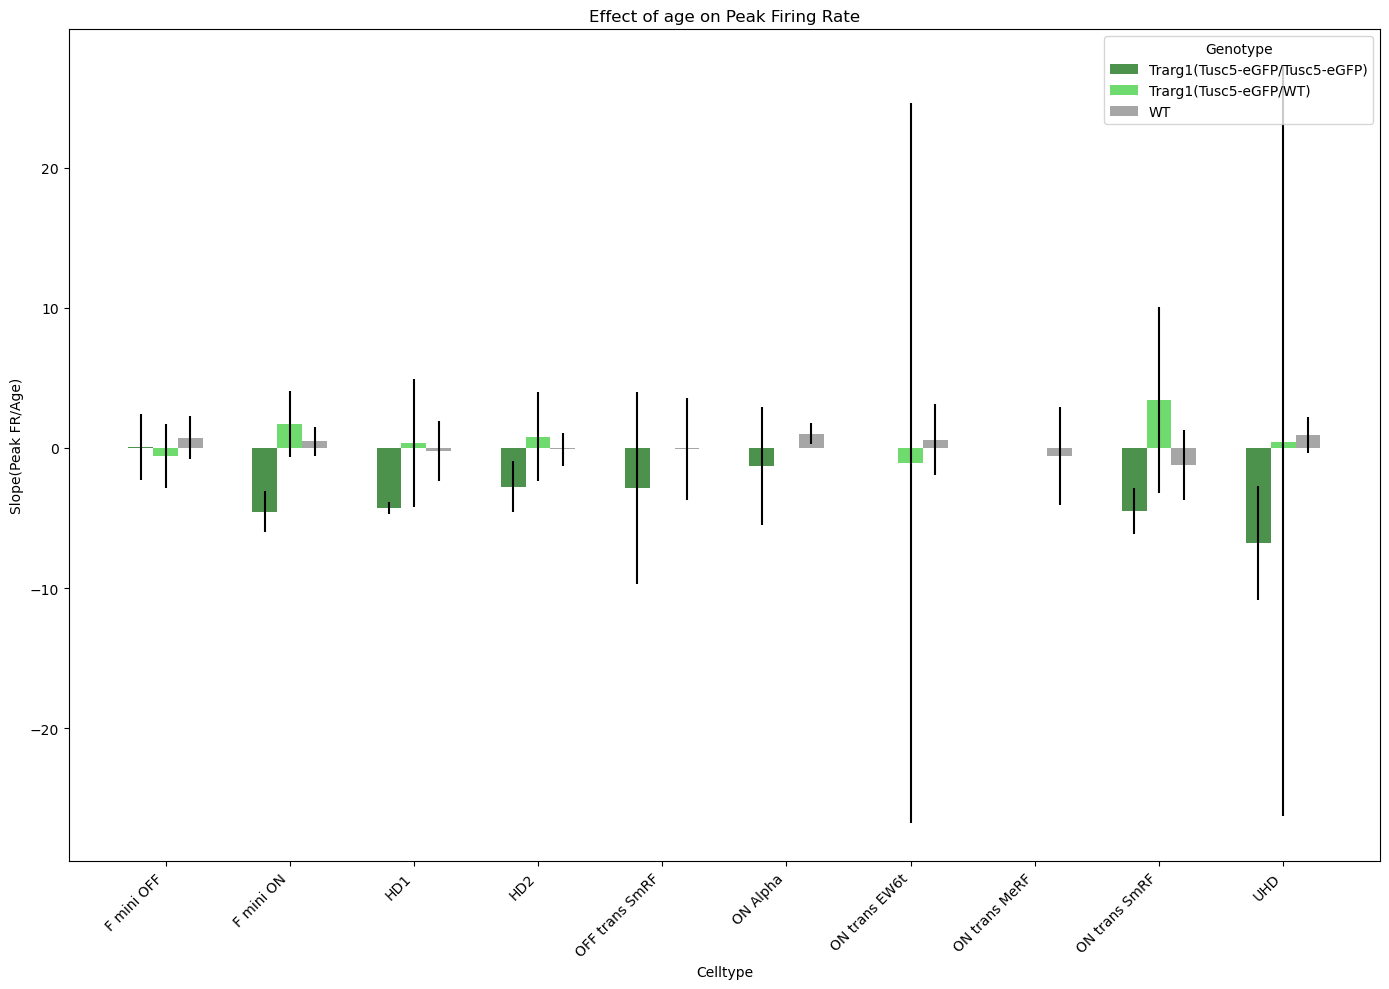

In [27]:
def calculate_yerr(subset):
    lower_error = subset['slope'] - subset['lower_ci']
    upper_error = subset['upper_ci'] - subset['slope']
    return np.array([lower_error, upper_error])
def plot_lr_results(df, graph, ylabel):
    fig, ax = plt.subplots(figsize=(14, 10))

    # Pivot the DataFrame
    pivot_df = df.pivot(index='celltype', columns='genotype', values=['slope', 'lower_ci', 'upper_ci'])

    width = 0.2  # width of the bars
    x = np.arange(len(pivot_df.index))  # the label locations

    # Define color mapping
    color_map = {
        'WT': 'gray',
        'Trarg1(Tusc5-eGFP/WT)': 'limegreen',
        'Trarg1(Tusc5-eGFP/Tusc5-eGFP)': 'darkgreen'
    }

    # Plot each genotype separately
    for i, genotype in enumerate(pivot_df['slope'].columns):
        slopes = pivot_df['slope'][genotype]
        lower_ci = pivot_df['lower_ci'][genotype]
        upper_ci = pivot_df['upper_ci'][genotype]
        yerr = calculate_yerr(pd.DataFrame({'slope': slopes, 'lower_ci': lower_ci, 'upper_ci': upper_ci}))
        
        color = color_map.get(genotype, 'black')  # Default to black if genotype is not in the map
        ax.bar(x + i * width, slopes, width, yerr=yerr, label=genotype, alpha=0.7, color=color)

    # Adding labels and title
    ax.set_xlabel('Celltype')
    ax.set_ylabel(ylabel)
    title = 'Effect of age on Peak Firing Rate'
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')
    ax.legend(title='Genotype')

    plt.tight_layout()
    plt.show()

# Example usage
plot_lr_results(df, 'Graph Name', 'Slope(Peak FR/Age)')